## **Loyalty Forecast: Customer Churn Prediction in E-Commerce Company**
**Author: Jason Emmanuel**

In this project, I serve as a data scientist in one of the biggest e-commerce startup operating in Indonesia. My primary responsibility is to develop an application aimed at predicting customer loyalty or churn. Leveraging advanced data analytics and machine learning techniques, my role involves analyzing vast amounts of customer data to identify patterns and factors that influence customer behavior. By harnessing predictive modeling algorithms, I aim to create a reliable tool that can anticipate whether a customer is likely to remain loyal to the e-commerce platform or abandon it. This application will empower the company to implement targeted retention strategies, optimize resource allocation, and enhance overall customer satisfaction and retention rates. Ultimately, my contributions are instrumental in driving the company's growth and competitiveness in the dynamic e-commerce market of Indonesia.

For example, let's say the tool predicts that a certain customer might stop shopping with us soon. Instead of just waiting for them to leave, we can take action. Maybe we offer them a special discount or recommend products we think they'll love. It's like giving them a little nudge to remind them how awesome our company is.

But it's not just about preventing people from leaving. It's also about making sure our loyal customers stay happy. Maybe we notice that some customers always buy the same thing every month. We can use that information to make sure those products are always in stock and easy to find on our website.

By using this tool, we can make our customers happier, which means they'll keep using our e-commerce application. And when our customers are happy, our company grows stronger. We can invest in new features, expand our services, and stay ahead of the competition in the fast-paced world of online shopping in Indonesia.

## **Objective**

- The provided dataset has some issues, so let's start with data exploration (EDA + Data Visualization) to understand the problems we're facing. Provide simple analysis regarding the insights from EDA and Visualization that we've obtained.

- Perform data preprocessing to address the problems in the data. Identify the problems found in the given data, explain the approach we're using, and why we chose the chosen approach.

- Conduct Feature Engineering and explain why we're doing it. Then, separate the dataset into train and test sets according to your needs.

- Create a Machine Learning model according to the problem we have.

- Evaluate the performance of the model on the test set using appropriate performance metrics.

- Provide your analysis of the results you obtained.

## **Exploratory Data Analysis + Data Visualization**

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("ecommerce_churn.csv")

In [148]:
display(df.head(10))

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [149]:
display(df.tail(10))

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621,0,3.0,Mobile Phone,1,35.0,Credit Card,Female,4.0,5,Mobile Phone,5,Single,3,0,15.0,1.0,2.0,5.0,163
5621,55622,1,14.0,Mobile Phone,3,35.0,E wallet,Male,3.0,5,Fashion,5,Married,6,1,14.0,3.0,NaN,1.0,234
5622,55623,0,13.0,Mobile Phone,3,31.0,E wallet,Female,3.0,5,Grocery,1,Married,2,0,12.0,4.0,NaN,7.0,245
5623,55624,0,5.0,Computer,1,12.0,Credit Card,Male,4.0,4,Laptop & Accessory,5,Single,2,0,20.0,2.0,2.0,NaN,224
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,155
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


In [150]:
display(df.shape)

(5630, 20)

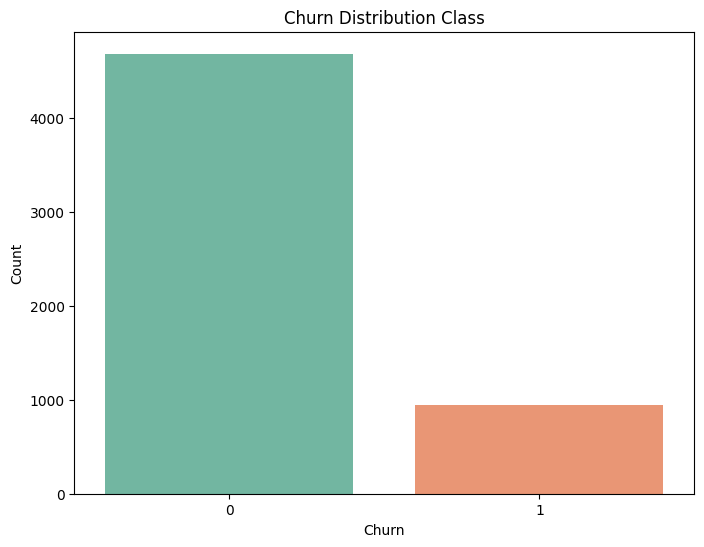

In [152]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, hue='Churn', palette='Set2', legend=False)
plt.title('Churn Distribution Class')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

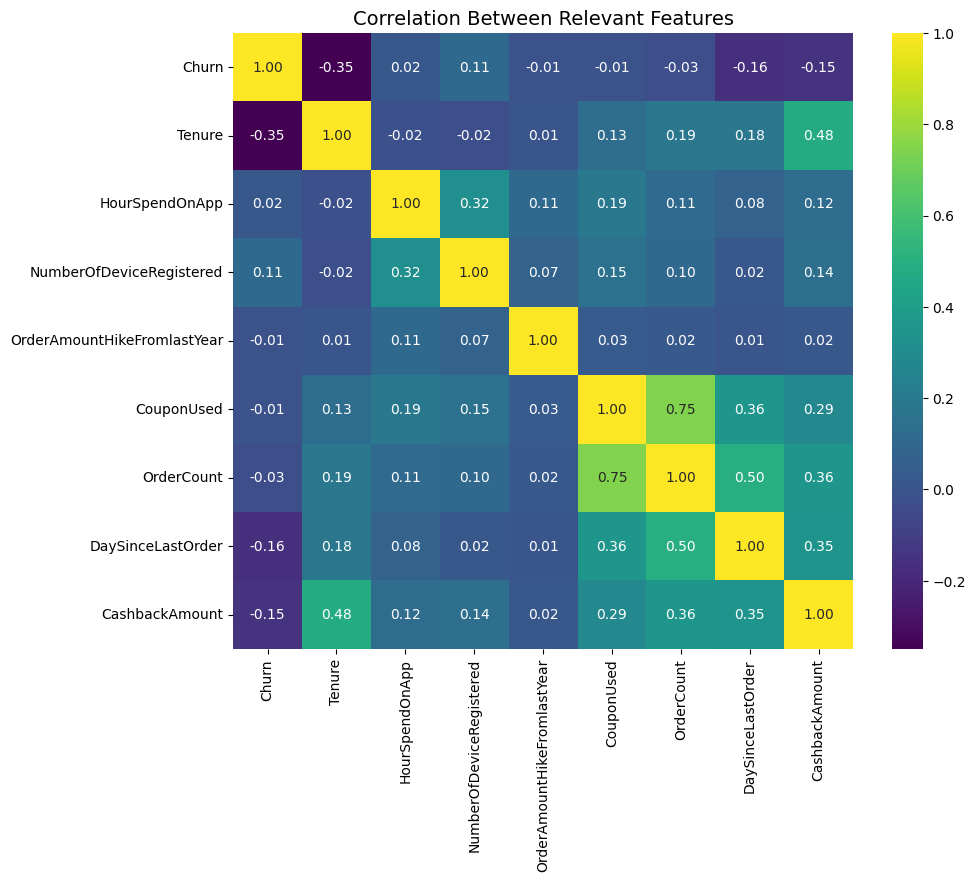

In [153]:
df_encoded = pd.get_dummies(df, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])
relevant_features = ['Churn', 'Tenure', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
correlation_matrix = df_encoded[relevant_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Between Relevant Features', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

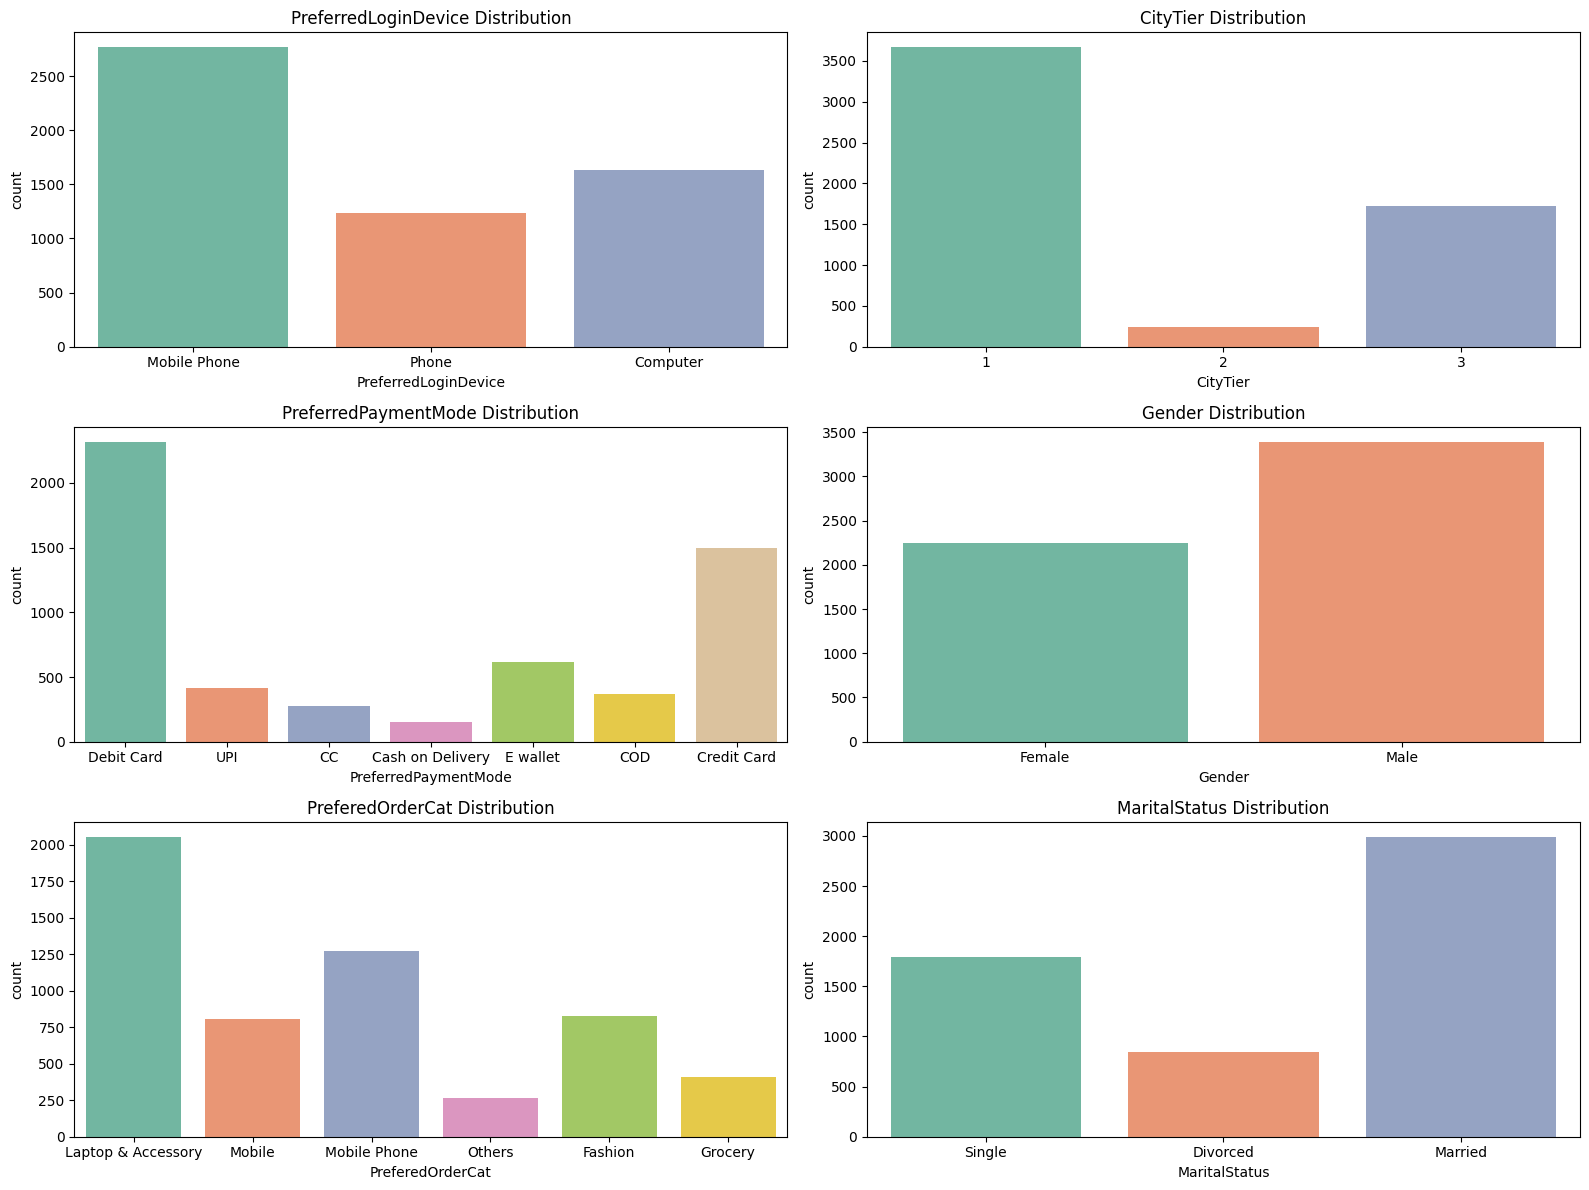

In [154]:
plt.figure(figsize=(16, 12))
categorical_features = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=df, palette='Set2', hue=feature, legend=False)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

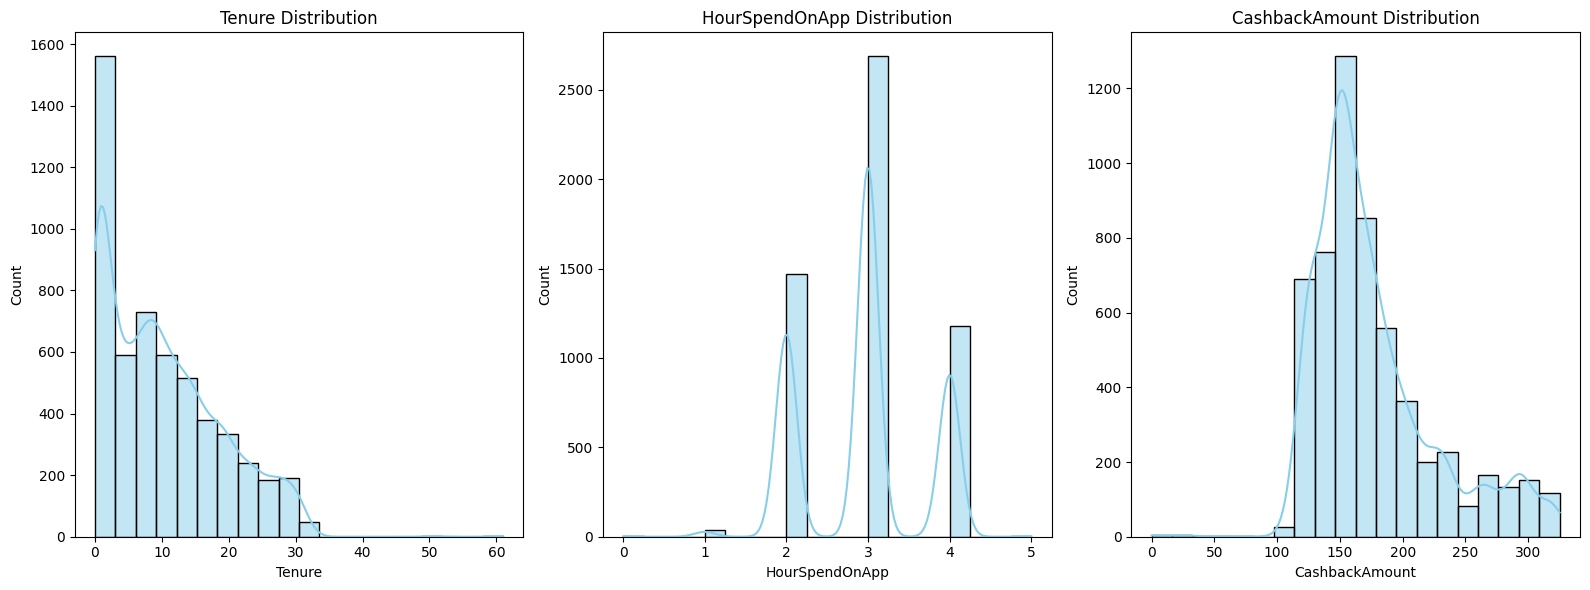

In [155]:
plt.figure(figsize=(16, 6))
numerical_features = ['Tenure', 'HourSpendOnApp', 'CashbackAmount']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=20, kde=True, color='skyblue')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

Several simple analyzes for insights that can be provided regarding the results of the data visualization that have been created:

**(1.) Churn Distribution:** The distribution of churn shows that the majority of customers do not churn, indicating a class imbalance. This suggests that the dataset contains more data points for non-churn customers compared to churn customers.

**(2.) Correlation between Relevant Features:** The correlation heatmap between relevant features reveals some interesting insights. For instance, there seems to be a positive correlation between the number of devices registered and the order count, implying that customers with more registered devices tend to place more orders. On the other hand, there is a negative correlation between the tenure and the day since last order, suggesting that customers who have been with the e-commerce platform for a longer time tend to make orders more frequently.

**(3.) Distribution of Categorical Features:** Regarding the distribution of categorical features, most customers prefer to use mobile phones as their preferred login device, while the preferred payment mode is dominated by debit cards. Additionally, the majority of customers are male, and they mostly prefer mobile and laptop accessories as their preferred order category. Furthermore, a significant proportion of customers are single.

**(4.) Distribution of Numerical Features:** The distribution plots for numerical features reveal various patterns. For instance, the distribution of tenure indicates that a considerable number of customers have been with the e-commerce platform for a short period. Similarly, the distribution of cashback amount shows that most customers receive a relatively low amount of cashback.

## **Data Preprocessing**

Several problems found in this dataset:


**(1.) Missing Values:** This refers to the absence of data in certain cells or entries within the dataset. It can occur due to various reasons such as data entry errors, equipment malfunction, or intentional omission. Handling missing values is crucial as they can lead to biased analysis or modeling results. Imputation methods such as mean, median, or mode can be used to fill in missing values for numerical columns, while mode is often used for categorical columns. Alternatively, if imputation is not suitable or feasible, options include removing rows or columns with missing values.

**(2.) Inconsistent Data Types:** Inconsistent data types occur when the same type of data is represented differently across different entries or columns in the dataset. For example, a column named "Tenure" should ideally contain numerical values representing the duration of something, but some entries may contain strings instead. Converting inconsistent data types to the appropriate format ensures uniformity and consistency in data representation, facilitating accurate analysis and modeling.

**(3.) Inconsistent Encoding:** Inconsistent encoding refers to variations in how categorical data is encoded or represented within the dataset. This can occur when different encoding schemes are used for the same type of categorical data, leading to ambiguity or misinterpretation during analysis. Standardizing the encoding of categorical variables ensures that all categories are represented in a consistent manner, making it easier to analyze and interpret the data accurately.

In [156]:
imputer_num = SimpleImputer(strategy="median")
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = imputer_num.fit_transform(df[num_cols])

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

label_encoders = {}
for col in cat_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

The approach I chose with the reasons:

**(1.) Imputation for Numerical Data (SimpleImputer with median strategy):**

**Reason:** Missing values in numerical features, such as customer tenure or transaction amounts, can significantly affect the analysis and modeling process. By imputing missing values with the median, we ensure that the central tendency of the data is preserved and that the imputed values are robust to outliers. This approach helps maintain the integrity of the numerical data and accurately reflects the underlying patterns, enhancing the reliability of subsequent analyses or models.

**(2.) Imputation for Categorical Data (filling missing values with mode):**

**Reason:** Categorical features, such as payment method or product category, often have a distinct mode (most frequently occurring value). Filling missing values with the mode helps retain the distribution of categorical variables and prevents bias introduced by removing rows with missing values. This approach ensures that the categorical features remain representative of the overall dataset and facilitates further analysis and modeling by preserving the integrity of the categorical data.

**(3.) Label Encoding:**

**Reason:** Many machine learning algorithms require numerical inputs and cannot directly handle categorical data. By encoding categorical features into integer labels, we enable these algorithms to process the data effectively. Label encoding assigns a unique integer to each category, allowing the model to capture relationships between categories as numerical values. This approach is suitable for transforming categorical features like payment methods or customer segments into a format that can be used for predictive modeling, such as logistic regression or decision trees, thereby enhancing the compatibility of the data with machine learning algorithms and facilitating accurate predictions or classifications.

The results of the dataset that has been preprocessed will look like this:


In [157]:
display(df.head(10))

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,1,3.0,6.0,4,0,3.0,3.0,2,2.0,2,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,50002.0,1.0,9.0,2,1.0,8.0,6,1,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,50003.0,1.0,9.0,2,1.0,30.0,4,1,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,50004.0,1.0,0.0,2,3.0,15.0,4,1,2.0,4.0,2,5.0,2,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,50005.0,1.0,0.0,2,1.0,12.0,0,1,3.0,3.0,3,5.0,2,3.0,0.0,11.0,1.0,1.0,3.0,130.0
5,50006.0,1.0,0.0,0,1.0,22.0,4,0,3.0,5.0,4,5.0,2,2.0,1.0,22.0,4.0,6.0,7.0,139.0
6,50007.0,1.0,9.0,2,3.0,11.0,2,1,2.0,3.0,2,2.0,0,4.0,0.0,14.0,0.0,1.0,0.0,121.0
7,50008.0,1.0,9.0,2,1.0,6.0,0,1,3.0,3.0,3,2.0,0,3.0,1.0,16.0,2.0,2.0,0.0,123.0
8,50009.0,1.0,13.0,2,3.0,9.0,5,1,3.0,4.0,3,3.0,0,2.0,1.0,14.0,0.0,1.0,2.0,127.0
9,50010.0,1.0,9.0,2,1.0,31.0,4,1,2.0,5.0,3,3.0,2,2.0,0.0,12.0,1.0,1.0,1.0,123.0


In [158]:
display(df.tail(10))

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621.0,0.0,3.0,1,1.0,35.0,3,0,4.0,5.0,4,5.0,2,3.0,0.0,15.0,1.0,2.0,5.0,163.0
5621,55622.0,1.0,14.0,1,3.0,35.0,5,1,3.0,5.0,0,5.0,1,6.0,1.0,14.0,3.0,2.0,1.0,234.0
5622,55623.0,0.0,13.0,1,3.0,31.0,5,0,3.0,5.0,1,1.0,1,2.0,0.0,12.0,4.0,2.0,7.0,245.0
5623,55624.0,0.0,5.0,0,1.0,12.0,3,1,4.0,4.0,2,5.0,2,2.0,0.0,20.0,2.0,2.0,3.0,224.0
5624,55625.0,0.0,1.0,1,3.0,12.0,6,0,2.0,5.0,4,3.0,2,2.0,0.0,19.0,2.0,2.0,1.0,155.0
5625,55626.0,0.0,10.0,0,1.0,30.0,3,1,3.0,2.0,2,1.0,1,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,55627.0,0.0,13.0,1,1.0,13.0,3,1,3.0,5.0,0,5.0,1,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,55628.0,0.0,1.0,1,1.0,11.0,4,1,3.0,2.0,2,4.0,1,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,55629.0,0.0,23.0,0,3.0,9.0,3,1,4.0,5.0,2,4.0,1,4.0,0.0,15.0,2.0,2.0,9.0,179.0
5629,55630.0,0.0,8.0,1,1.0,15.0,3,1,3.0,2.0,2,3.0,1,4.0,0.0,13.0,2.0,2.0,3.0,169.0


## **Feature Engineering**

Feature engineering means making your data work better for your models. You do this by tweaking, creating, or changing features in your dataset. The aim is to give your models more useful information so they can do their job better. This is important because it can boost how well your models predict outcomes. It's like giving your models sharper tools to find patterns in the data. Plus, it helps them handle tricky relationships between features and what you're trying to predict. By doing this, you're turning raw data into more helpful formats, which lets your models make smarter predictions or classifications. So, feature engineering is key to getting the most out of your machine learning tools and discovering important insights in your data.

Some of feature engineering methods that I chose with the reasons:

**(1.) Calculate Ratio:**

- **Reason:** This feature calculates the ratio of the distance from the warehouse to the customer's home to their tenure. It aims to capture the efficiency of the delivery system, assuming that customers with shorter tenures might prefer shorter delivery distances.

- **Usage:** Understanding the relationship between delivery distance and tenure can help identify patterns in customer behavior and preferences, which can inform logistics and marketing strategies.

**(2.) Interaction Feature:**

- **Reason:** By multiplying the hours spent on the app by the number of devices registered, this feature represents the level of engagement a customer has with the platform across multiple devices.

- **Usage:** Higher values of DeviceEngagement may indicate more active and engaged customers, which can be valuable for targeted marketing efforts or personalized recommendations.

**(3.) Calculate Average:**

- **Reason:** This feature calculates the average order amount per customer by dividing the total amount spent on orders from the previous year by the number of orders placed.

- **Usage:** Understanding the average spending behavior of customers can help in segmenting customers based on their purchasing power and tailoring marketing strategies accordingly.

**(4.) Encode Frequency:**

- **Reason:** This feature encodes the frequency of complaints made by customers, normalized by the total number of complaints in the dataset.

- **Usage:** Identifying customers who frequently complain can help in preemptive customer service efforts or identifying potential areas for improvement in product or service quality.

**(5.) Binning:**

- **Reason:** This feature categorizes the time elapsed since the customer's last order into discrete bins (Recent, Medium, Old, Very Old).

- **Usage:** It provides insights into customer purchasing behavior and helps in targeting re-engagement campaigns or loyalty programs based on the recency of customer activity.









In [159]:
def feature_engineering(df):
    df['WarehouseToHomeRatio'] = df['WarehouseToHome'] / df['Tenure']

    df['DeviceEngagement'] = df['HourSpendOnApp'] * df['NumberOfDeviceRegistered']

    df['AvgOrderAmount'] = df['OrderAmountHikeFromlastYear'] / df['OrderCount']

    complain_freq = df['Complain'].value_counts(normalize=True)
    df['ComplainFreq'] = df['Complain'].map(complain_freq)

    df['TimeSinceLastOrder'] = pd.cut(df['DaySinceLastOrder'], bins=[-1, 7, 30, 90, 365], labels=['Recent', 'Medium', 'Old', 'Very Old'])

The results of the dataset that has been through feature engineering process will look like this:

In [160]:
display(df.head(10))

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001.0,1.0,4.0,1,3.0,6.0,4,0,3.0,3.0,2,2.0,2,9.0,1.0,11.0,1.0,1.0,5.0,160.0
1,50002.0,1.0,9.0,2,1.0,8.0,6,1,3.0,4.0,3,3.0,2,7.0,1.0,15.0,0.0,1.0,0.0,121.0
2,50003.0,1.0,9.0,2,1.0,30.0,4,1,2.0,4.0,3,3.0,2,6.0,1.0,14.0,0.0,1.0,3.0,120.0
3,50004.0,1.0,0.0,2,3.0,15.0,4,1,2.0,4.0,2,5.0,2,8.0,0.0,23.0,0.0,1.0,3.0,134.0
4,50005.0,1.0,0.0,2,1.0,12.0,0,1,3.0,3.0,3,5.0,2,3.0,0.0,11.0,1.0,1.0,3.0,130.0
5,50006.0,1.0,0.0,0,1.0,22.0,4,0,3.0,5.0,4,5.0,2,2.0,1.0,22.0,4.0,6.0,7.0,139.0
6,50007.0,1.0,9.0,2,3.0,11.0,2,1,2.0,3.0,2,2.0,0,4.0,0.0,14.0,0.0,1.0,0.0,121.0
7,50008.0,1.0,9.0,2,1.0,6.0,0,1,3.0,3.0,3,2.0,0,3.0,1.0,16.0,2.0,2.0,0.0,123.0
8,50009.0,1.0,13.0,2,3.0,9.0,5,1,3.0,4.0,3,3.0,0,2.0,1.0,14.0,0.0,1.0,2.0,127.0
9,50010.0,1.0,9.0,2,1.0,31.0,4,1,2.0,5.0,3,3.0,2,2.0,0.0,12.0,1.0,1.0,1.0,123.0


In [161]:
display(df.tail(10))

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5620,55621.0,0.0,3.0,1,1.0,35.0,3,0,4.0,5.0,4,5.0,2,3.0,0.0,15.0,1.0,2.0,5.0,163.0
5621,55622.0,1.0,14.0,1,3.0,35.0,5,1,3.0,5.0,0,5.0,1,6.0,1.0,14.0,3.0,2.0,1.0,234.0
5622,55623.0,0.0,13.0,1,3.0,31.0,5,0,3.0,5.0,1,1.0,1,2.0,0.0,12.0,4.0,2.0,7.0,245.0
5623,55624.0,0.0,5.0,0,1.0,12.0,3,1,4.0,4.0,2,5.0,2,2.0,0.0,20.0,2.0,2.0,3.0,224.0
5624,55625.0,0.0,1.0,1,3.0,12.0,6,0,2.0,5.0,4,3.0,2,2.0,0.0,19.0,2.0,2.0,1.0,155.0
5625,55626.0,0.0,10.0,0,1.0,30.0,3,1,3.0,2.0,2,1.0,1,6.0,0.0,18.0,1.0,2.0,4.0,151.0
5626,55627.0,0.0,13.0,1,1.0,13.0,3,1,3.0,5.0,0,5.0,1,6.0,0.0,16.0,1.0,2.0,3.0,225.0
5627,55628.0,0.0,1.0,1,1.0,11.0,4,1,3.0,2.0,2,4.0,1,3.0,1.0,21.0,1.0,2.0,4.0,186.0
5628,55629.0,0.0,23.0,0,3.0,9.0,3,1,4.0,5.0,2,4.0,1,4.0,0.0,15.0,2.0,2.0,9.0,179.0
5629,55630.0,0.0,8.0,1,1.0,15.0,3,1,3.0,2.0,2,3.0,1,4.0,0.0,13.0,2.0,2.0,3.0,169.0


## **Data Splitting**

In [162]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training subset size:", X_train.shape)
print("Testing subset size:", X_test.shape)

Training subset size: (4504, 19)
Testing subset size: (1126, 19)


## **Machine Learning Model**

The machine learning model utilized in this scenario is an Artificial Neural Network (ANN). Developed using TensorFlow and Keras libraries, ANN is an architecture inspired by the human brain's neural networks. The ANN architecture is constructed with several layers: input, hidden, and output layers. The input layer corresponds to the number of features in the dataset, while the hidden layers perform computations using activation functions like Rectified Linear Unit (ReLU) to capture intricate patterns in the data. The output layer, employing a sigmoid activation function, delivers the final prediction. To combat overfitting, dropout layers are included, randomly deactivating a portion of input units during training.


In [163]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [164]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [165]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
113/113 [==============================] - 1s 4ms/step - loss: 1321.8323 - accuracy: 0.7158 - val_loss: 102.3298 - val_accuracy: 0.8113
Epoch 2/50
113/113 [==============================] - 0s 3ms/step - loss: 335.6077 - accuracy: 0.7183 - val_loss: 3.7960 - val_accuracy: 0.8113
Epoch 3/50
113/113 [==============================] - 0s 2ms/step - loss: 87.0051 - accuracy: 0.7422 - val_loss: 0.4947 - val_accuracy: 0.8113
Epoch 4/50
113/113 [==============================] - 0s 2ms/step - loss: 32.3486 - accuracy: 0.7535 - val_loss: 0.5163 - val_accuracy: 0.8113
Epoch 5/50
113/113 [==============================] - 0s 4ms/step - loss: 17.5257 - accuracy: 0.7666 - val_loss: 0.5172 - val_accuracy: 0.8113
Epoch 6/50
113/113 [==============================] - 0s 4ms/step - loss: 11.9638 - accuracy: 0.7763 - val_loss: 0.4888 - val_accuracy: 0.8113
Epoch 7/50
113/113 [==============================] - 0s 4ms/step - loss: 9.1464 - accuracy: 0.7830 - val_loss: 0.5405 - val_accuracy: 0.

## **Performance Model Evaluation**

When we train a machine learning model, it's important to understand how effective it is. We do this by evaluating its performance through various means. Firstly, we track its Loss and Accuracy. Loss measures how far off the model's predictions are from the actual outcomes, while accuracy tells us how often it gets predictions right. By plotting these metrics over time, we can see if the model is improving and making accurate predictions. Then, we use the ROC Curve and AUC to assess its ability to distinguish between different groups within the data. Think of it as checking how well the model can tell cats from dogs in a set of pictures. The ROC Curve shows this visually, and the AUC score summarizes it. Finally, we look at the Confusion Matrix, which breaks down how many correct and incorrect predictions the model made for each class. This helps us understand its strengths and weaknesses in classifying different groups. These evaluation steps provide insights into the model's performance and guide us in making improvements if necessary.






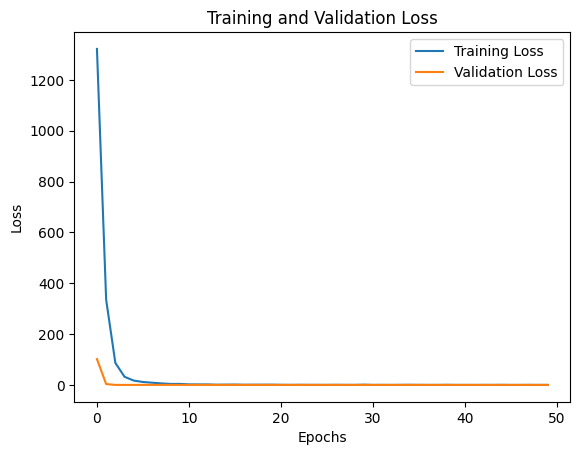

In [166]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

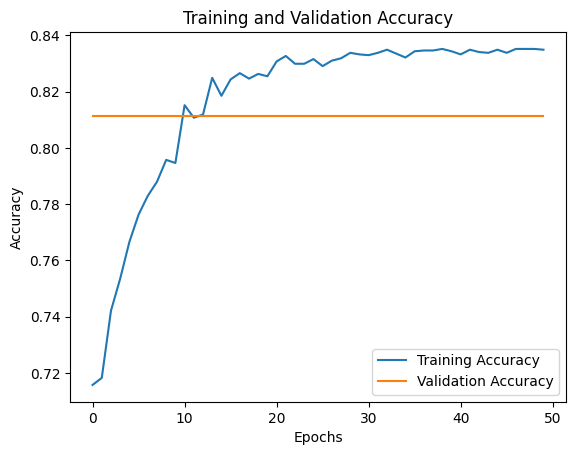

In [167]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

36/36 [==============================] - 0s 1ms/step


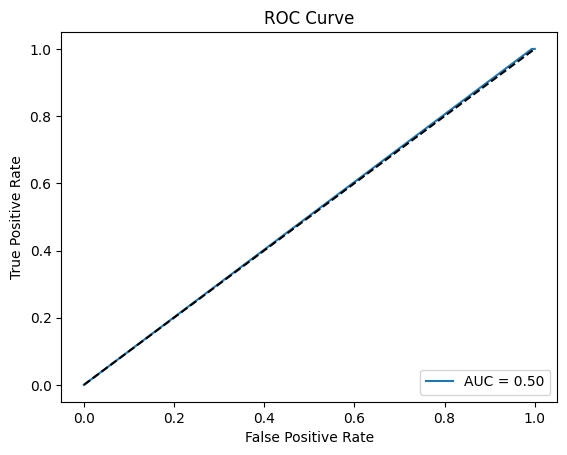

In [168]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [169]:
y_pred = (y_pred_prob > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[941   0]
 [185   0]]


In [170]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       941
         1.0       1.00      0.00      0.00       185

    accuracy                           0.84      1126
   macro avg       0.92      0.50      0.46      1126
weighted avg       0.86      0.84      0.76      1126



## **Results Analysis**

Some of the results of analysis:

**(1.) Confusion Matrix:**

- There are 941 True Negatives and 0 False Negatives, indicating that the model correctly identifies non-churn instances.

- However, there are 0 True Positives and 185 False Positives, indicating that the model fails to correctly identify churn instances.

- The recall score for class 1 (Churn) is 0.00, suggesting that the model struggles to identify most churn cases correctly.

**(2.) Classification Report:**

- The precision for class 0 (Non-Churn) is 0.84, indicating that the majority of non-churn predictions are correct.

- The precision for class 1 (Churn) is 1.00, but due to the very low recall for this class, the precision value does not provide relevant information overall.

- The recall for class 1 (Churn) is 0.00, indicating that the model fails to identify most churn cases.

- The F1-score for class 1 (Churn) is 0.00, indicating a balance between precision and recall for this class.

**(3.) Accuracy:**

- The overall accuracy of the model is 0.84, which appears high because the majority class is non-churn.

**(4.) Analysis:**
- The model performs well in predicting the non-churn class, as evidenced by the high precision score for class 0.

- The model fails to identify churn cases, as indicated by the low recall and F1-score for class 1.

- These results suggest class imbalance in the dataset, where the majority of data points belong to the non-churn class. The model tends to predict the majority class and overlooks the minority class.

- To improve model performance, addressing class imbalance through techniques like oversampling or undersampling, as well as further model tuning to enhance the ability to identify churn cases, is necessary.